In [2]:
#import
from qiskit import *
from numpy import identity as eye, trace, kron
import numpy as np
import matplotlib.pyplot as plt
from qiskit.providers.aer import noise
from qiskit.quantum_info import Pauli, state_fidelity, basis_state, \
    process_fidelity, random_state, projector
from qiskit.tools.visualization import plot_histogram
from qiskit.visualization import plot_histogram
import glob
import PIL 

In [3]:
IBMQ.save_account('(INSERT USER IBMQ TOKEN HERE)', overwrite=True)
IBMQ.load_account()
provider = IBMQ.get_provider('ibm-q')

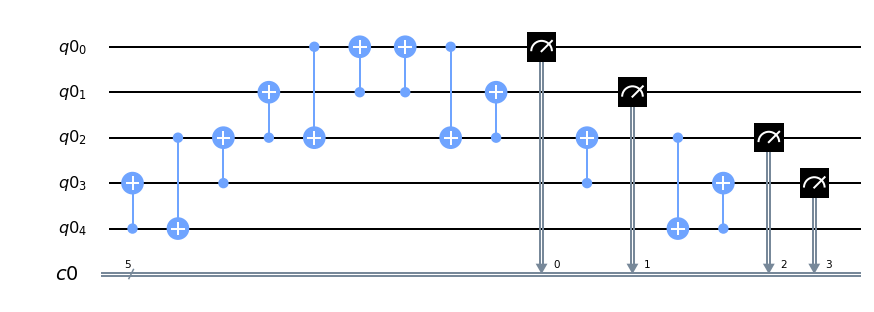

In [5]:
#Setup Quantum System
q3 = QuantumRegister(5)
c3 = ClassicalRegister(5)
qc3 = QuantumCircuit(q3, c3)

#Identity

# encode

qc3.cx(q3[4],q3[3])
qc3.cx(q3[2],q3[4])
qc3.cx(q3[3],q3[2])

qc3.cx(q3[2],q3[1])
qc3.cx(q3[0], q3[2])
qc3.cx(q3[1], q3[0])

qc3.cx(q3[1],q3[0])
qc3.cx(q3[0], q3[2])
qc3.cx(q3[2],q3[1])

qc3.cx(q3[3],q3[2])
qc3.cx(q3[2],q3[4])
qc3.cx(q3[4],q3[3])


qc3.measure(q3[0], c3[0])
qc3.measure(q3[1], c3[1])
qc3.measure(q3[2], c3[2])
qc3.measure(q3[3], c3[3])


qc3.draw()
qc3.draw(output="mpl")

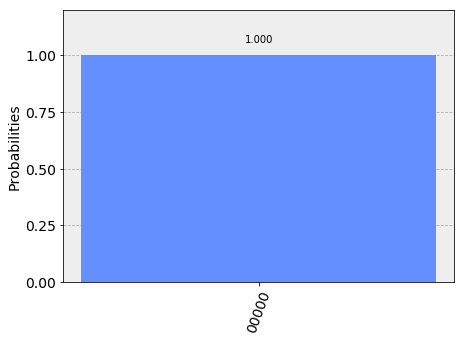

In [6]:
#Simulate
simulator = Aer.get_backend('qasm_simulator')
result = execute(qc3, backend=simulator).result()
plot_histogram(result.get_counts(qc3))

In [7]:
#Run it on a real backend

num_qubits = 5

from qiskit.providers.ibmq import least_busy #Select the least busy device
from qiskit.tools.monitor import job_monitor
possible_devices = provider.backends(filters=lambda x: 
                                     x.configuration().n_qubits >= num_qubits
                                       and 
                                     x.configuration().simulator == False)
qcomp = least_busy(possible_devices)
print(qcomp)

ibmq_burlington


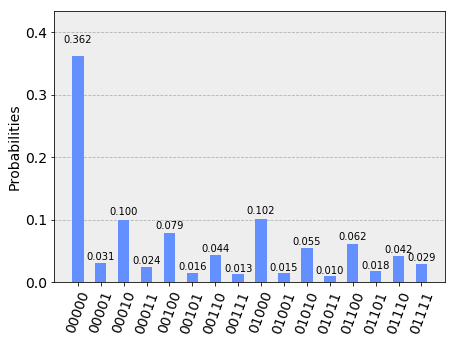

In [8]:
#device: ibmq_burlington
job = execute(qc3, backend=qcomp)
result = job.result()
plot_histogram(result.get_counts(qc3))

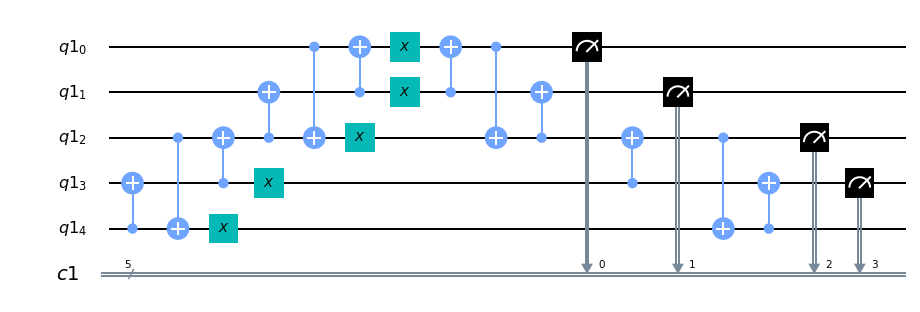

In [9]:
# X-error

#Setup Quantum System
q4 = QuantumRegister(5)
c4 = ClassicalRegister(5)
qc4 = QuantumCircuit(q4, c4)

#Identity

# encode

qc4.cx(q4[4],q4[3])
qc4.cx(q4[2],q4[4])
qc4.cx(q4[3],q4[2])

qc4.cx(q4[2],q4[1])
qc4.cx(q4[0], q4[2])
qc4.cx(q4[1], q4[0])

qc4.x(q4)

qc4.cx(q4[1],q4[0])
qc4.cx(q4[0], q4[2])
qc4.cx(q4[2],q4[1])

qc4.cx(q4[3],q4[2])
qc4.cx(q4[2],q4[4])
qc4.cx(q4[4],q4[3])


qc4.measure(q4[0], c4[0])
qc4.measure(q4[1], c4[1])
qc4.measure(q4[2], c4[2])
qc4.measure(q4[3], c4[3])


qc4.draw()
qc4.draw(output="mpl")

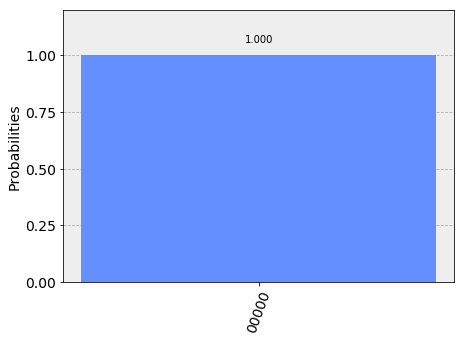

In [10]:
#Simulate
simulator = Aer.get_backend('qasm_simulator')
result = execute(qc4, backend=simulator).result()
plot_histogram(result.get_counts(qc4))

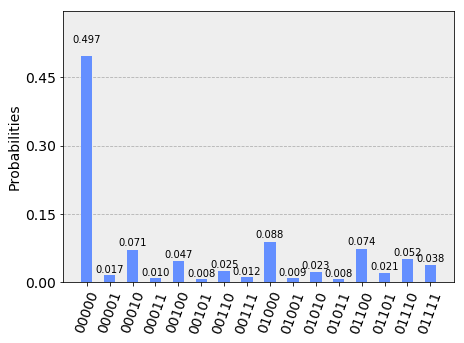

In [11]:
#device: ibmq_burlington
job = execute(qc4, backend=qcomp)
result = job.result()
plot_histogram(result.get_counts(qc4))

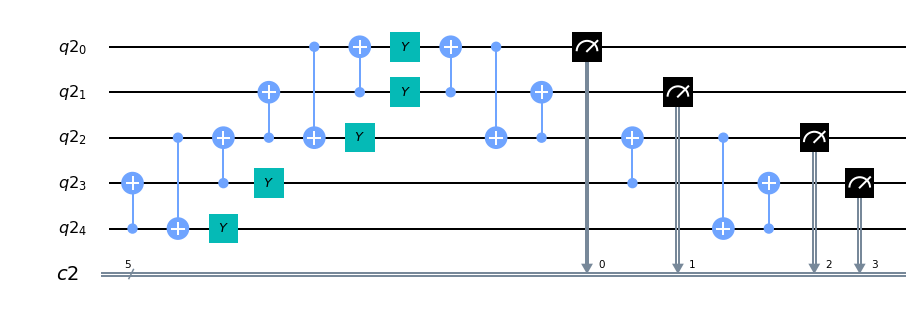

In [12]:
# Y-error

#Setup Quantum System
q5 = QuantumRegister(5)
c5 = ClassicalRegister(5)
qc5 = QuantumCircuit(q5, c5)

#Identity

# encode

qc5.cx(q5[4],q5[3])
qc5.cx(q5[2],q5[4])
qc5.cx(q5[3],q5[2])

qc5.cx(q5[2],q5[1])
qc5.cx(q5[0], q5[2])
qc5.cx(q5[1], q5[0])

qc5.y(q5)

qc5.cx(q5[1],q5[0])
qc5.cx(q5[0], q5[2])
qc5.cx(q5[2],q5[1])

qc5.cx(q5[3],q5[2])
qc5.cx(q5[2],q5[4])
qc5.cx(q5[4],q5[3])


qc5.measure(q5[0], c5[0])
qc5.measure(q5[1], c5[1])
qc5.measure(q5[2], c5[2])
qc5.measure(q5[3], c5[3])


qc5.draw()
qc5.draw(output="mpl")

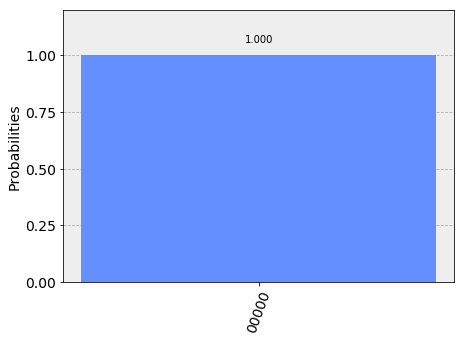

In [13]:
#Simulate
simulator = Aer.get_backend('qasm_simulator')
result = execute(qc5, backend=simulator).result()
plot_histogram(result.get_counts(qc5))

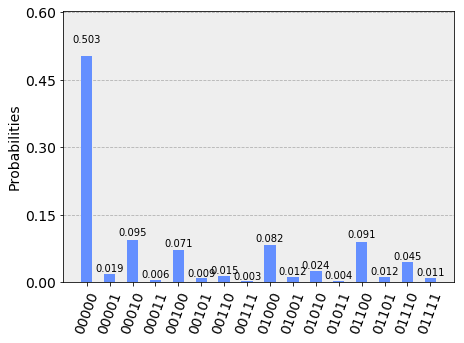

In [14]:
#device: ibmq_burlington
job5 = execute(qc5, backend=qcomp)
result = job5.result()
plot_histogram(result.get_counts(qc5))

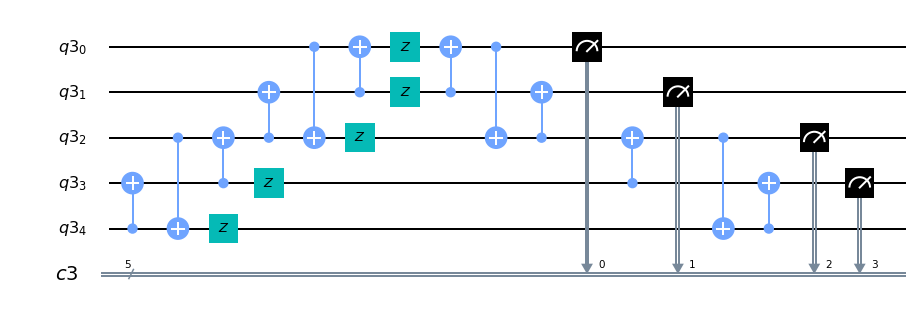

In [15]:
# Z-error


#Setup Quantum System
q6 = QuantumRegister(5)
c6 = ClassicalRegister(5)
qc6 = QuantumCircuit(q6, c6)

#Identity

# encode

qc6.cx(q6[4],q6[3])
qc6.cx(q6[2],q6[4])
qc6.cx(q6[3],q6[2])

qc6.cx(q6[2],q6[1])
qc6.cx(q6[0], q6[2])
qc6.cx(q6[1], q6[0])

qc6.z(q6)

qc6.cx(q6[1],q6[0])
qc6.cx(q6[0], q6[2])
qc6.cx(q6[2],q6[1])

qc6.cx(q6[3],q6[2])
qc6.cx(q6[2],q6[4])
qc6.cx(q6[4],q6[3])



qc6.measure(q6[0], c6[0])
qc6.measure(q6[1], c6[1])
qc6.measure(q6[2], c6[2])
qc6.measure(q6[3], c6[3])


qc6.draw()
qc6.draw(output="mpl")

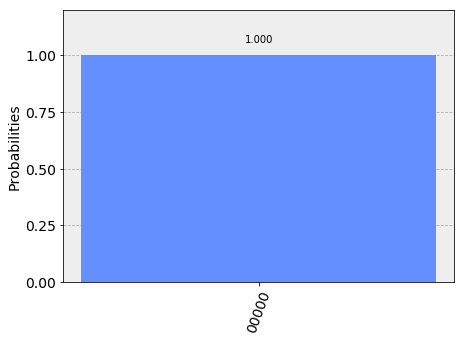

In [16]:
#Simulate
simulator = Aer.get_backend('qasm_simulator')
result = execute(qc6, backend=simulator).result()
plot_histogram(result.get_counts(qc6))

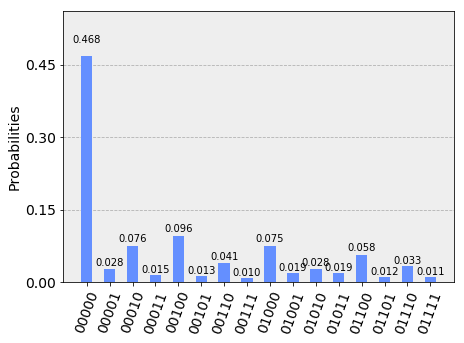

In [17]:
#device: ibmq_burlington
job6 = execute(qc6, backend=qcomp)
result = job6.result()
plot_histogram(result.get_counts(qc6))